# Digital == Quantization

The first thing to really get used to when dealing with digital images is the concept of quantization. Because we have to represent images in a finite fashion, when real objects and surfaces are continuous surfaces, this requires us to simplify the information. 

Let's illustrate this with a function, before we talk about images. Say we have the function $y = 2 x^2$. The continuous representation would look like this:

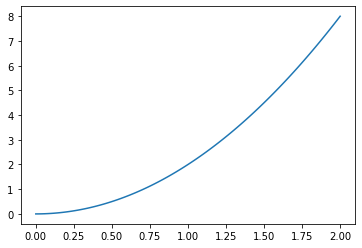

In [2]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 2, 101)
y = 2*x**2

plt.plot(x, y)

In reality, the function as I've defined it *isn't* continuous. In this case, I have taken 101 *samples* of x and y to represent the function (that's what the `np.linspace` function does). It would be more accurate to represent the data thus:

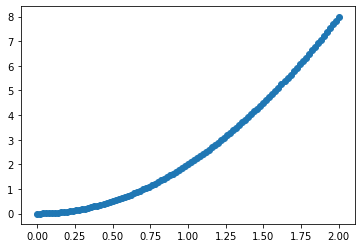

In [3]:
x = np.linspace(0, 2, 101)
y = 2*x**2

plt.scatter(x, y)

It might be easier to visualize if I reduce the sampling even more to say, 21 points:

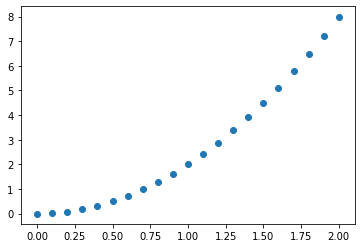

In [5]:
x = np.linspace(0, 2, 21)
y = 2*x**2

plt.scatter(x, y)

If an image is represented as a continuous 2D function $f(x,y)$, where the output is the pixel value at the coordinates $x,y$, we need to sample in both coordinates and amplitude. Digitizing coordinate values is called **sampling**. Digitizing amplitude values is called **quantization**.

After performing this digitizing process, an image becomes a matrix of pixel values.

In [6]:
from skimage import data

In [11]:
im = data.moon()
print(im)

[[116 116 122 ...  93  96  96]
 [116 116 122 ...  93  96  96]
 [116 116 122 ...  93  96  96]
 ...
 [109 109 112 ... 117 116 116]
 [114 114 113 ... 118 118 118]
 [114 114 113 ... 118 118 118]]


(-0.5, 49.5, 49.5, -0.5)

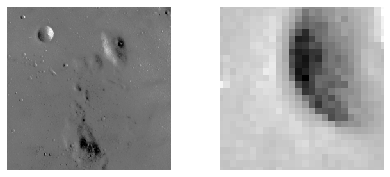

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(7,3))

ax[0].imshow(im, cmap='gray')
ax[0].axis('off')

ax[1].imshow(im[75:125, 75:125], cmap='gray')
ax[1].axis('off')

# Zooming and Shrinking Images

Zooming into an image to make it bigger can be thought of as *oversampling* an image. It requires two steps: 

1. creating new pixel locations
2. assigning gray levels to these new locations

If we have a 500x500 pixel image, and we want to enlarge it 1.5 times to get a 750x750 image, you could visualize this process by imposing a 750x750 grid on the existing image. Pixel levels are assigned by *nearest neighbor interpolation*. Nearest-neighbor interpolation is fast, but creates a checkerboard effect that is undesirable. 

In [16]:
from skimage.transform import resize, rescale

(-0.5, 399.5, 399.5, -0.5)

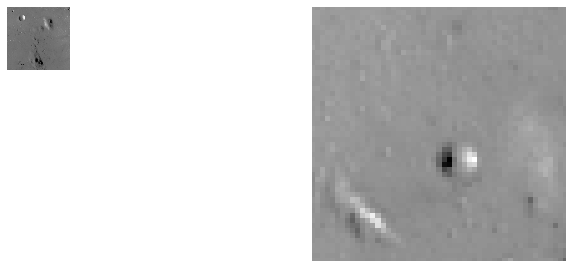

In [33]:
im_2x = rescale(im, 4, order=0)
im_1x = 0*im_2x + 256
im_1x[0:512, 0:512] = im

fig, ax = plt.subplots(ncols=2, figsize=(10, 10))

ax[0].imshow(im_1x, cmap='gray')
ax[0].axis('off')

ax[1].imshow(im_2x[500:900, 500:900], cmap='gray')
ax[1].axis('off')

You can get rid of some of this blockiness from zooming by using a form of interpolation using the four nearest neighbours. 

(-0.5, 399.5, 399.5, -0.5)

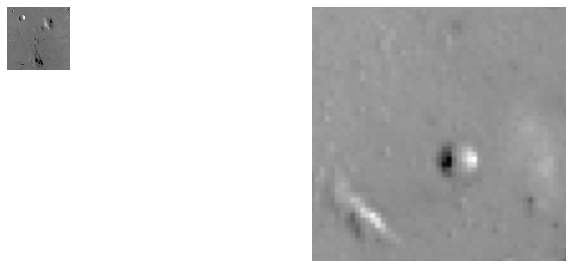

In [35]:
im_2x = rescale(im, 4, order=1)
im_1x = 0*im_2x + 256
im_1x[0:512, 0:512] = im

fig, ax = plt.subplots(ncols=2, figsize=(10, 10))

ax[0].imshow(im_1x, cmap='gray')
ax[0].axis('off')

ax[1].imshow(im_2x[500:900, 500:900], cmap='gray')
ax[1].axis('off')

Essentially the same process is done when shrinking images. You have to re-sample at a lower rate, and you can do different forms of interpolation to fill in the pixel values.

(-0.5, 50.5, 50.5, -0.5)

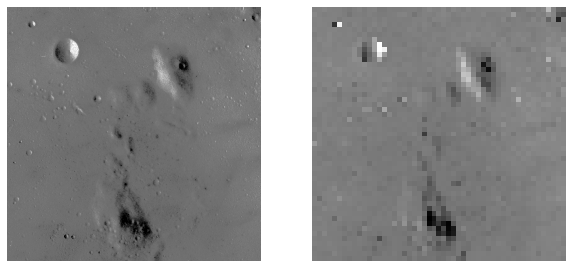

In [42]:
im_2x = rescale(im, 0.1, order=0, anti_aliasing=False)

fig, ax = plt.subplots(ncols=2, figsize=(10, 10))

ax[0].imshow(im, cmap='gray')
ax[0].axis('off')

ax[1].imshow(im_2x, cmap='gray')
ax[1].axis('off')

It is generally a good idea to blur the image first before rescaling the image. This gets rid of an effect known as *aliasing*. Aliasing has to do with high-frequency information in a signal or image. Blurring the image first removes high-frequency information before down-sampling.

(-0.5, 50.5, 50.5, -0.5)

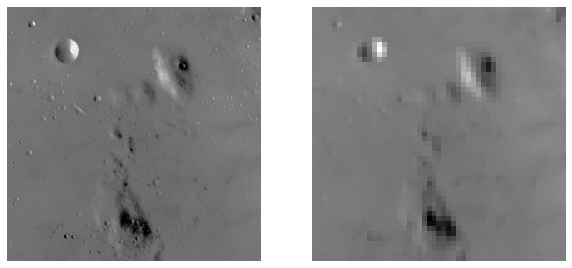

In [43]:
im_2x = rescale(im, 0.1, order=3, anti_aliasing=True)

fig, ax = plt.subplots(ncols=2, figsize=(10, 10))

ax[0].imshow(im, cmap='gray')
ax[0].axis('off')

ax[1].imshow(im_2x, cmap='gray')
ax[1].axis('off')

# Pixel Relationships

A pixel p has four *horizontal* and *vertical* neighbors, with coordinates given by:

$$(x+1,y), (x-1,y), (x,y+1), (x,y-1) $$

This set of pixels is called the *4-neighbors* of p, $N_4(p)$. The four *diagonal* neighbors of p have coordinates:

$$(x+1,y+1),(x+1,y-1), (x-1,y+1), (x-1,y-1) $$

These, together with the 4-neighbors of p, comprise the *8-neighbors* of p, $N_8(p)$.

Text(0.5, 1.0, 'diagonals')

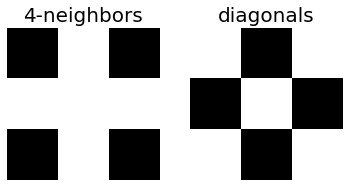

In [50]:
N4 = np.array([[0,1,0],[1,1,1],[0,1,0]])

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(N4, cmap='gray')
ax[0].axis('off')
ax[0].set_title('4-neighbors', fontsize=20)

ND = np.array([[1,0,1],[0,1,0],[1,0,1]])
ax[1].imshow(ND, cmap='gray')
ax[1].axis('off')
ax[1].set_title('diagonals', fontsize=20)

# Adjacency, Connectivity, Regions, Boundaries

Let V be the set of gray values used to define adjacency. In a binary image, $V=\{1\}$ if we are referring to adjacent pixels with a value of 1.

1. *4-adjacency*: Two pixels p and q with values from V are 4-adjacent if q is in the set $N_4(p)$.
2. *8-adjacency*: Two pixels p and q with values from V are 8-adjacent if q is in the set $N_8(p)$.

A *path* or *curve* from pixel p at (x,y) to pixel q at (s,t) is a sequence of distinct pixels with coordinates

$$(x_0, y_0), (x_1, y_1), (x_n, y_n) $$

where n is the *length* of the path.

Let S represent a subset of pixels in an image. Two pixels p and q are said to be *connected* in S i there exists a path between them consisting entirely of pixels in S.

Let R represent a subset of pixels in an image. R is a *region* of the image if R is a *connected set*. The *boundary* (or *border* or *contour*) of R is the set of pixels in the region that have one or more neighbors that are not in R.

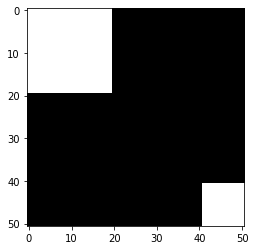

In [65]:
xi = np.linspace(0, 50, 51).astype(int)
yi = np.linspace(0, 50, 51).astype(int)

x, y = np.meshgrid(xi, yi)
im_set = np.zeros((51,51))

im_set[(x < 20) & (y < 20)] = 1
im_set[(x > 40) & (y > 40)] = 1

plt.imshow(im_set, cmap='gray')

# Distance Measures

For pixels p, q, and z with coordinates (x,y), (s,t), and (v,w), respectively, D is a *distance function* if 

1. $D(p,q) \ge 0$
2. $D(p,q) = D(q,p)$
3. $D(p,z) \le D(p,q) + D(q,z)$

The *Euclidian distance* is defined as

$$D_e(p,q) = [(x-s)^2 + (y-t)^2]^{1/2} $$

(-0.5, 50.5, 50.5, -0.5)

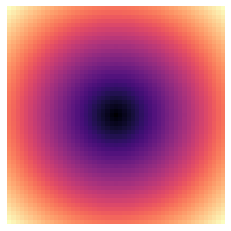

In [72]:
xi = np.linspace(0, 50, 51).astype(int)
yi = np.linspace(0, 50, 51).astype(int)

x, y = np.meshgrid(xi, yi)

im_eu = ((x-25)**2 + (y-25)**2)**0.5

plt.imshow(im_eu, cmap='magma')
plt.axis('off')

The *D4 distance* or *city-block distance* between p and q is defined as:

$$D_4(p,q) = \mid x - s \mid + \mid y - t \mid $$

(-0.5, 50.5, 50.5, -0.5)

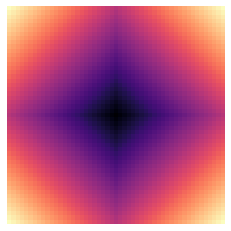

In [73]:
im_D4 = np.abs(x-25) + np.abs(y-25)

plt.imshow(im_D4, cmap='magma')
plt.axis('off')

The *D8 distance* or *chessboard distance* between p and q is defined as:

$$D_8(p,q) = \max{(\mid x - s \mid, \mid y - t \mid)} $$

(-0.5, 50.5, 50.5, -0.5)

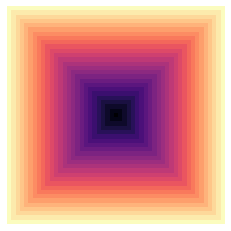

In [84]:
im_D8 = 0*im_D4
im_D8[np.abs(x-25) >= np.abs(y-25)] = np.abs(x-25)[np.abs(x-25) >= np.abs(y-25)]
im_D8[np.abs(x-25) < np.abs(y-25)] = np.abs(y-25)[np.abs(x-25) < np.abs(y-25)]

plt.imshow(im_D8, cmap='magma')
plt.axis('off')

# In-Class Exercises

* Try implementing a few other distance metrics from the `scipy.spatial.distance` package. As these functions only calculate the distance between two points, and we are calculating distances for a whole image of points simulataneously, you may have to write the functions out yourself.
* Read the documentation for some of the functions used in this lesson, and try modifying some of the inputs to change their behavior.

(-0.5, 50.5, 50.5, -0.5)

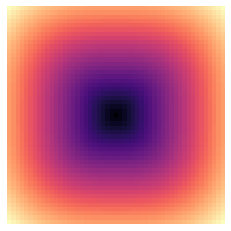

In [89]:
# Minkowski distance

im_Dm = (np.abs(x-25)**3 + np.abs(y-25)**3)**(1/3)

plt.imshow(im_Dm, cmap='magma')
plt.axis('off')

(-0.5, 50.5, 50.5, -0.5)

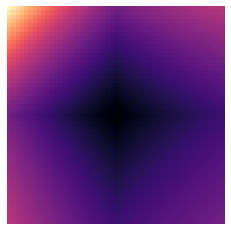

In [95]:
# Bray-Curtis distance

im_DB = (np.abs(x-25) + np.abs(y-25))/(np.abs(x+25) + np.abs(y+25))

plt.imshow(im_DB, cmap='magma')
plt.axis('off')